In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans,DBSCAN

In [9]:
image_path="./output_videos/cropped_player_track_11.jpg"
image=cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2Lab)

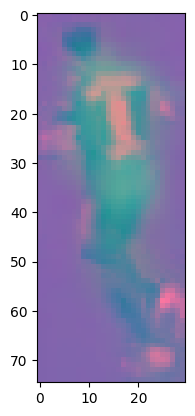

In [10]:
plt.imshow(image)
plt.show()


# Take top half of image

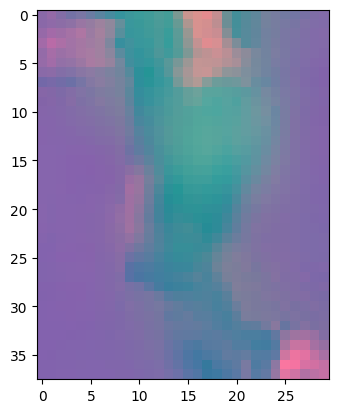

(38, 30, 3)
[[[137  97 172]
  [136  97 172]
  [138  97 173]
  ...
  [132  99 172]
  [133  98 173]
  [133  98 173]]

 [[135  98 172]
  [135  98 172]
  [135  98 172]
  ...
  [134  98 172]
  [133  98 173]
  [133  98 173]]

 [[135  99 171]
  [136  99 171]
  [131  99 171]
  ...
  [134  98 172]
  [134  98 173]
  [134  97 173]]

 ...

 [[127  99 172]
  [127  99 172]
  [128 100 173]
  ...
  [117 115 164]
  [112 114 164]
  [114 113 164]]

 [[127  99 172]
  [127  99 172]
  [128 100 173]
  ...
  [107 114 165]
  [111 113 164]
  [116 112 165]]

 [[127  99 172]
  [127  99 172]
  [128 100 173]
  ...
  [113 114 166]
  [118 112 165]
  [116 112 166]]]


In [11]:
h=image.shape[0]
start=int(h*0.3)
end=int(h*0.8)

top_half=image[start:end,:]
plt.imshow(top_half)
plt.show()
print(top_half.shape)
print(image)

#Cluster image

[0 0 0 ... 0 0 0]


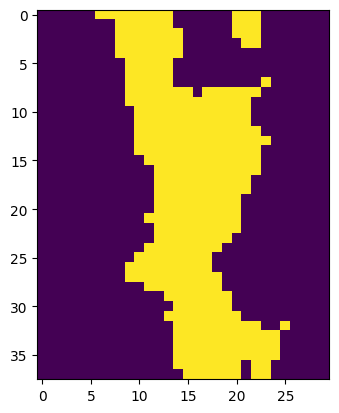

[[111 138  57]
 [123 148  67]
 [112 130  54]
 ...
 [164 174 101]
 [176 186 113]
 [184 196 122]]


In [ ]:
#Image -> 2d array
image_2d=top_half.reshape(-1,3)

#k-means with 2 clusters
k_means=KMeans(n_clusters=2,init='k-means++',random_state=42)

#get clusters
k_means.fit(image_2d)

labels=k_means.labels_
print(labels)
#reshape
clustered_image=labels.reshape(top_half.shape[0],top_half.shape[1])

plt.imshow(clustered_image)
plt.show()
print(image_2d)

In [55]:
corner_clusters=[clustered_image[0,0],clustered_image[0,-1],
                 clustered_image[-1,0],clustered_image[-1,-1]]

non_player=max(set(corner_clusters),key=corner_clusters.count)
print("Non-player cluster:", non_player)

Non-player cluster: 0


In [56]:
player=1-non_player
print("Player cluster:", player)

Player cluster: 1


In [57]:
k_means.cluster_centers_[player]

array([ 77.28717949, 141.27948718, 156.28974359])